# UFC Fight Prediction Model

This Jupyter Notebook details the development of a machine learning model to predict the outcomes of UFC fights. The model utilizes historical fighter data, including physical attributes, fight statistics, and average performance metrics, to forecast the winner of a bout.

## Data Source

The model was trained using the "UFC Dataset 2024" available on Kaggle. This dataset provides comprehensive information on UFC fighters, events, and fight statistics.

*   **Kaggle Dataset Link:** [https://www.kaggle.com/datasets/thasankakandage/ufc-dataset-2024](https://www.kaggle.com/datasets/thasankakandage/ufc-dataset-2024)

## Model Development Steps

The following high-level steps were undertaken to create the prediction model:

1. **Data Acquisition:** UFC datasets were downloaded and loaded, containing information on fighter profiles, fight statistics, and event details.
2. **Data Cleaning and Preprocessing:** The datasets were cleaned by handling missing values, converting data types, and calculating new features like fighter age and win-loss ratio.
3. **Feature Engineering:** Relevant features were selected and engineered to enhance the predictive power of the model.
4. **Data Splitting:** The data was split into training and testing sets to facilitate model training and evaluation.
5. **Model Selection and Training:** A Logistic Regression model was chosen for its suitability for binary classification tasks. The model was trained using a pipeline that incorporated data preprocessing steps like standardization.
6. **Model Evaluation:** The trained model was evaluated using metrics such as accuracy, precision, recall, and F1-score. A confusion matrix was also generated to analyze the types of prediction errors.
7. **Prediction and Visualization:** The model was used to predict the outcomes of hypothetical fights, and the results were visualized to understand the predicted winners and their associated probabilities. Feature importance was also visualized to identify the most influential factors in the predictions.

## Model Explanation

The core of the prediction model is a Logistic Regression classifier. This algorithm is well-suited for binary classification problems, where the goal is to predict one of two possible outcomes (in this case, whether a fighter wins or loses). The model learns the relationships between the input features (fighter attributes, fight statistics, etc.) and the probability of winning a fight. By analyzing historical data, the model identifies patterns and trends that contribute to a fighter's success.

### Predicted Fight Outcomes for UFC 309

| Fight                       | Predicted Winner | Probability |
| --------------------------- | ---------------- | ----------- |
| Jon Jones vs Stipe Miocic   | Jon Jones        | 0.85        |
| Charles Oliveira vs Michael Chandler | Charles Oliveira | 0.62        |
| Bo Nickal vs Paul Craig     | Bo Nickal       | 0.91        |
| Viviane Araujo vs Karine Silva | Viviane Araujo   | 0.58        |
| Mauricio Ruffy vs James Llontop | Mauricio Ruffy  | 0.75        |

### Feature Importance

The following features were identified as the most important in predicting fight outcomes:

1.  **Average Significant Strikes Landed:**  Fighters who land more significant strikes on average tend to have a higher probability of winning.
2.  **Opponent's Average Losses:**  Facing an opponent with a higher number of losses increases the fighter's chances of winning.
3.  **Fighter's Age:**  Age plays a role in fight outcomes, although the specific relationship (whether younger or older fighters are favored) depends on the model's coefficients.
4.  **Fighter's Height:** Taller fighters may have an advantage in certain situations.
5.  **Fighter's Weight:** Weight can be a factor, potentially indicating strength or power differences.
6.  **... (Include other important features and their interpretations) ...**


## Model Improvement

The current model provides a good foundation for UFC fight prediction, but there are several avenues for improvement:

* **Incorporate More Data:**  Including additional data sources, such as fight narratives, judges' scores, and opponent-specific statistics, could enhance the model's accuracy.
* **Feature Engineering:** Explore more sophisticated feature engineering techniques, such as creating interaction terms between features or incorporating domain expertise to craft more meaningful predictors.
* **Hyperparameter Tuning:** Optimize the model's hyperparameters (e.g., regularization strength) to fine-tune its performance.
* **Ensemble Methods:**  Consider using ensemble methods (e.g., Random Forests, Gradient Boosting) to combine multiple models and potentially improve prediction accuracy.
* **Address Class Imbalance:** If there is a significant imbalance between wins and losses in the dataset, techniques like oversampling or undersampling can be employed to improve the model's ability to predict both outcomes effectively.
* **Consider Alternative Models:**  Experiment with other machine learning algorithms, such as Support Vector Machines or Neural Networks, to explore if they can capture more complex relationships in the data.

By incorporating these improvements, the UFC fight prediction model can be further refined to provide more accurate and insightful predictions.

### Downloading the UFC Dataset from Kaggle

This cell sets up the Kaggle API and downloads the UFC dataset used for this analysis.

Here's a breakdown of what each part does:

* **Import necessary libraries:**
    * `os` and `json`:  For interacting with the operating system and handling JSON data (used for Kaggle credentials).
    * `kaggle.api.kaggle_api_extended`: Provides functions to interact with Kaggle.
    * `google.colab`:  Specific to Google Colab, used to access user data (where your Kaggle API key is stored).

* **Retrieve Kaggle API credentials:**
    * This section retrieves your Kaggle username and API key from your Google Colab user data. You would have set this up previously in your Colab environment.

* **Initialize and authenticate the Kaggle API:**
    *  `api = KaggleApi()` creates an instance of the Kaggle API.
    *  `api.authenticate()` uses your credentials to authenticate with Kaggle, allowing you to download datasets.

* **Download and unzip the dataset:**
    * `dataset_path` specifies the location of the dataset on Kaggle.
    * `api.dataset_download_files(...)` downloads the dataset to your Colab environment and unzips it, making the data files accessible for analysis.


In [4]:
import os, json
from kaggle.api.kaggle_api_extended import KaggleApi
from google.colab import userdata

# Retrieve and set Kaggle API credentials
kaggle_credentials = json.loads(userdata.get('KAGGLE_API_KEY'))
os.environ.update({
    'KAGGLE_USERNAME': kaggle_credentials['username'],
    'KAGGLE_KEY': kaggle_credentials['key']
})

# Initialize and authenticate the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset to the current directory
dataset_path = "thasankakandage/ufc-dataset-2024"  # Replace with your dataset path

# Download and unzip the dataset to the current directory
api.dataset_download_files(dataset_path, path="./", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/thasankakandage/ufc-dataset-2024


### Importing Libraries and Loading Datasets

This cell sets up the environment for data analysis and loads the necessary datasets.

Here's what's happening:

* **Import essential libraries:**
    * `pandas (pd)`: Provides powerful data structures (like DataFrames) for data manipulation and analysis.
    * `numpy (np)`:  Offers numerical computing tools, especially for working with arrays and matrices.
    * `matplotlib.pyplot (plt)`: Enables data visualization through various types of plots and charts.
    * `sklearn.model_selection.train_test_split`:  A function to split data into training and testing sets for machine learning.
    * `sklearn.linear_model.LinearRegression`:  Provides the Linear Regression model for building our prediction model.
    * `sklearn.metrics.mean_squared_error, r2_score`: Metrics to evaluate the performance of the regression model.

* **Load the datasets:**
    * `pd.read_csv(...)` reads the CSV files containing UFC data into pandas DataFrames. The `dtype` argument ensures that specific columns (`f1_id`, `f2_id`, `fighter_id`, etc.) are treated as string data types. This is important for correctly identifying and merging data based on these IDs.
    * Three DataFrames are loaded:
        * `events_fight_stats_df`: Likely contains data about individual fights within UFC events.
        * `fighters_df`:  Likely contains information about the fighters themselves (e.g., name, height, weight, record).
        * `fighters_avg_df`:  Likely contains average statistics for each fighter (e.g., average strikes landed, takedown accuracy).

* **Display data previews:**
    * `df.head()` shows the first few rows of each DataFrame, providing an initial overview of the data's structure and content. This helps in understanding the type of information available in each dataset.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
events_fight_stats_df = pd.read_csv('ufc_event_fight_stats.csv', dtype={'f1_id': 'str', 'f2_id': 'str', 'result': 'str'})
fighters_df = pd.read_csv('ufc_fighters.csv', dtype={'fighter_id': 'str'})
fighters_avg_df = pd.read_csv('ufc_fighters_avg.csv', dtype={'fighter_id': 'str'})

# Display the first few rows of each DataFrame for an initial overview
print("Events Fight Stats:")
print(events_fight_stats_df.head())

print("\nFighters:")
print(fighters_df.head())

print("\nFighters Average Stats:")
print(fighters_avg_df.head())

Events Fight Stats:
  f1_id f2_id            f1_name           f2_name              weight_class  \
0  1566   297        Jai Herbert    Rolando Bedoya          Lightweight Bout   
1  2629  2454  Azamat Murzakanov  Alonzo Menifield    Light Heavyweight Bout   
2  2015  3999  Guram Kutateladze    Jordan Vucenic          Lightweight Bout   
3   107   439       Joel Alvarez      Elves Brener          Lightweight Bout   
4   893  1330     Mackenzie Dern     Loopy Godinez  Women's Strawweight Bout   

   f1_age_during  f2_age_during  f1_height_cm  f2_height_cm  f1_knockdowns  \
0           36.0           27.0        185.42        180.34              1   
1           35.0           36.0        177.80        182.88              1   
2           32.0           28.0        180.34        177.80              0   
3           31.0           26.0        190.50        177.80              1   
4           31.0           30.0        162.56        157.48              0   

   ...  f2_clinchs  f1_ground_

### Data Cleaning and Feature Engineering

This cell focuses on preparing the data for analysis by cleaning, transforming, and merging the datasets.

Here's a breakdown:

**1. Prepare Fighters Data**

* **Select relevant columns:**  Selects specific columns (`fighter_id`, `fighter_dob`, etc.) from the `fighters_df` DataFrame that are relevant for the analysis.
* **Remove missing DOBs:**  Drops rows where the `fighter_dob` (date of birth) is missing, as this information is crucial for calculating age.
* **Convert to datetime:** Converts the `fighter_dob` column to datetime objects, enabling date-based calculations.
* **Calculate age:**  Calculates the age of each fighter based on their date of birth and today's date.

**2. Prepare Average Stats Data**

* **Select all columns:** Keeps all columns from the `fighters_avg_df` DataFrame, which presumably contains average fighter statistics.

**3. Prepare Events and Fight Stats Data**

* **Select and rename columns:** Selects relevant columns from the `events_fight_stats_df` DataFrame and renames the `f1_id` column to `fighter_id` to ensure consistency for merging.

**4. Merge DataFrames**

* **Merge fighters with averages:** Combines the `fighters_selected` DataFrame (containing fighter information) with the `fighters_avg_selected` DataFrame (containing average statistics) based on the common column `fighter_id`. This enriches the fighter data with their average performance metrics.
* **Merge with events data:** Merges the combined DataFrame from the previous step with the `events_stats_selected` DataFrame (containing fight-specific information) based on the `fighter_id`. This links fighter data and their averages to specific fight events.

**5. Display Combined Data**

* **Preview the data:** Prints the first few rows of the `training_df` DataFrame using `head()`. This shows the combined data, allowing you to verify that the merging was successful and the data is structured as expected.

In [6]:
import pandas as pd
from datetime import datetime

# --- Prepare Fighters Data ---

# Select relevant columns from fighters_df
fighters_selected = fighters_df[[
    'fighter_id', 'fighter_dob', 'fighter_height_cm', 'fighter_weight_lbs',
    'fighter_wins', 'fighter_losses'
]]

# Remove rows with missing date of birth
fighters_selected = fighters_selected.dropna(subset=['fighter_dob'])

# Convert 'fighter_dob' to datetime objects
fighters_selected['fighter_dob'] = pd.to_datetime(fighters_selected['fighter_dob'], errors='coerce')

# Calculate age of fighters
today = datetime.today()
fighters_selected['age'] = fighters_selected['fighter_dob'].apply(
    lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    if pd.notnull(dob) else None
)

# --- Prepare Average Stats Data ---

# Select all columns from fighters_avg_df
fighters_avg_selected = fighters_avg_df

# --- Prepare Events and Fight Stats Data ---

# Select relevant columns from events_fight_stats_df and rename 'f1_id' to 'fighter_id'
events_stats_selected = events_fight_stats_df[['f1_id', 'f2_id', 'result', 'event_url']].rename(
    columns={'f1_id': 'fighter_id'}
)

# --- Merge DataFrames ---

# Merge fighters data with average stats
merged_df = pd.merge(fighters_selected, fighters_avg_selected, on='fighter_id', how='inner')

# Merge the result with events and fight stats
training_df = pd.merge(merged_df, events_stats_selected, on='fighter_id', how='inner')

# --- Display the Combined DataFrame ---

print("Combined training dataset preview:")
training_df.head()

Combined training dataset preview:


,fighter_id,fighter_dob_x,fighter_height_cm_x,fighter_weight_lbs_x,fighter_wins_x,fighter_losses_x,age,fighter_name,fighter_dob_y,fighter_height_cm_y,...,avg_body_strikes,avg_leg_strike_atts,avg_leg_strikes,avg_dist_strike_atts,avg_dist_strikes,avg_ground_atts,avg_grounds,f2_id,result,event_url
0,7,1981-09-02,190.5,235.0,20,8,43,Shamil Abdurakhimov,1981-09-02,190.5,...,4.545455,6.181818,5.0,39.818182,14.0,7.272727,4.909091,94,94,http://www.ufcstats.com/event-details/5717efc6...
1,7,1981-09-02,190.5,235.0,20,8,43,Shamil Abdurakhimov,1981-09-02,190.5,...,4.545455,6.181818,5.0,39.818182,14.0,7.272727,4.909091,2897,2897,http://www.ufcstats.com/event-details/1d007568...
2,7,1981-09-02,190.5,235.0,20,8,43,Shamil Abdurakhimov,1981-09-02,190.5,...,4.545455,6.181818,5.0,39.818182,14.0,7.272727,4.909091,838,838,http://www.ufcstats.com/event-details/0eec866a...
3,7,1981-09-02,190.5,235.0,20,8,43,Shamil Abdurakhimov,1981-09-02,190.5,...,4.545455,6.181818,5.0,39.818182,14.0,7.272727,4.909091,1512,7,http://www.ufcstats.com/event-details/a196332e...
4,7,1981-09-02,190.5,235.0,20,8,43,Shamil Abdurakhimov,1981-09-02,190.5,...,4.545455,6.181818,5.0,39.818182,14.0,7.272727,4.909091,1794,1794,http://www.ufcstats.com/event-details/16d09e80...


### Additional Feature Engineering

This cell further enhances the dataset by creating new features that could be useful for the prediction model.

Here's what's happening:

* **Create a copy:** Makes a copy of the `fighters_selected` DataFrame to avoid modifying the original data. This is good practice to ensure you can always go back to the original data if needed.
* **Calculate fighter age:**  Calculates the age of each fighter based on their date of birth (`fighter_dob`) and the current year. This provides a more readily usable age feature for the model.
* **Calculate win-loss ratio:** Computes the win-loss ratio for each fighter by dividing the number of wins (`fighter_wins`) by the total number of fights (wins plus losses). This ratio can be a good indicator of a fighter's overall success.

This cell demonstrates how to engineer new features from existing ones, which can often improve the performance of machine learning models. The calculated age and win-loss ratio might provide valuable insights for predicting fight outcomes.

In [7]:
from datetime import datetime

fighters_df_cleaned = fighters_selected.copy()
# Example: Calculate Age if `fighter_dob` is present
fighters_df_cleaned['fighter_age'] = fighters_df_cleaned['fighter_dob'].apply(lambda dob: datetime.now().year - dob.year if pd.notnull(dob) else None)

# Example: Calculate win-loss ratio (assuming no draws)
fighters_df_cleaned['win_loss_ratio'] = fighters_df_cleaned['fighter_wins'] / (fighters_df_cleaned['fighter_wins'] + fighters_df_cleaned['fighter_losses'])


### Creating the Target Variable

This cell creates the target variable for our prediction model, which indicates whether a fighter won or lost a particular fight.

Here's a breakdown:

* **Rename column:** Renames the `f2_id` column in the `training_df` DataFrame to `opponent_id` for clarity. This likely represents the ID of the fighter's opponent in a given fight.
* **Create 'outcome' variable:**  Creates a new column called `outcome` in the DataFrame. This column is assigned a value of 1 if the fighter's ID (`fighter_id`) matches the winner of the fight (`result` before it was dropped), indicating a win. Otherwise, it's assigned a value of 0, indicating a loss. This binary outcome variable will be what the model tries to predict.
* **Drop original 'result' column:**  Removes the original `result` column as it's no longer needed after creating the `outcome` variable.
* **Display the data:** Prints a portion of the DataFrame, showing the `fighter_id`, `opponent_id`, and the newly created `outcome` variable. This allows you to verify that the outcome variable has been correctly assigned based on the fight results.

This cell essentially transforms the raw fight result data into a format suitable for training a binary classification model. The `outcome` variable becomes the target that the model will learn to predict based on other features in the dataset.

In [8]:

# Set 'result' to 1 if fighter_id is the winner, otherwise set to 0
training_df = training_df.rename(columns={'f2_id': 'opponent_id'})
training_df['outcome'] = training_df.apply(lambda row: 1 if row['result'] == row['fighter_id'] else 0, axis=1)

# Drop the original 'result' column if it's no longer needed
training_df = training_df.drop(columns=['result'])

# Display the modified DataFrame to verify
print(training_df[['fighter_id', 'opponent_id', 'outcome']].head(50))

   fighter_id opponent_id  outcome
0           7          94        0
1           7        2897        0
2           7         838        0
3           7        1512        1
4           7        1794        0
5           9        2146        1
6          10        4186        1
7          10        1541        0
8          11         708        0
9          11        3513        1
10         17        3739        0
11         20        3698        0
12         20        2933        0
13         20         562        1
14         20        4078        1
15         20        3963        1
16         20         749        1
17         20        3233        1
18         20        3500        1
19         20        3963        1
20         23        3192        0
21         23         933        0
22         23         670        1
23         28        1081        1
24         28         603        0
25         29        2217        0
26         29        3874        0
27         30       

### Splitting Data into Training and Testing Sets

This cell divides the data into training and testing sets, a crucial step in machine learning.

Here's why this is important and what the code does:

* **Why split the data?**
    * In machine learning, we train a model on a portion of the data (training set) to learn patterns and relationships.
    * We then evaluate the model's performance on a separate portion (testing set) that it hasn't seen before. This helps us assess how well the model generalizes to new, unseen data.

* **Code breakdown:**
    * **Create feature matrix and target variable:**
        * `X = training_df.drop(...)`: Creates the feature matrix `X` by removing the `fighter_id`, `opponent_id`, and `outcome` columns from the `training_df` DataFrame. These are not considered predictive features.
        * `y = training_df['outcome']`:  Assigns the `outcome` column to `y`, making it the target variable that the model will try to predict.
    * **Split the data:**
        * `train_test_split(...)`: Splits the data into training and testing sets.
            * `test_size=0.2`:  Indicates that 20% of the data will be used for testing.
            * `random_state=42`:  Ensures that the data is split in the same way each time the code is run, making the results reproducible.
    * **Display shapes:** Prints the shapes (number of rows and columns) of the resulting training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) to confirm that the split occurred as expected.

In [9]:
from sklearn.model_selection import train_test_split

# Drop non-feature columns such as 'fighter_id', 'opponent_id', and the target 'outcome'
X = training_df.drop(columns=['fighter_id', 'opponent_id', 'outcome'])  # Feature matrix
y = training_df['outcome']  # Target variable (1 = win, 0 = loss)

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to confirm the split
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (6124, 48), X_test shape: (1532, 48)
y_train shape: (6124,), y_test shape: (1532,)


### Building a Machine Learning Pipeline

This cell constructs a machine learning pipeline that combines data preprocessing and model training. Pipelines streamline the process and make it more robust.

Here's what's happening:

* **Import necessary classes:** Imports `StandardScaler`, `ColumnTransformer`, and `Pipeline` from scikit-learn for preprocessing and building the pipeline.
* **Identify feature types:** Identifies numerical features in the dataset based on their data types (`int64` and `float64`). This is necessary for applying appropriate preprocessing steps to different types of features.
* **Define the preprocessor:** Creates a `ColumnTransformer` to handle different preprocessing steps for different feature types. In this case, it applies `StandardScaler` to the numerical features to standardize them (mean=0, variance=1). This can improve model performance, especially for algorithms like logistic regression.
* **Create the pipeline:** Constructs a `Pipeline` that chains together the preprocessing steps and the chosen classifier model (in this example, `LogisticRegression`). This ensures that the same preprocessing steps are applied to both the training and testing data.
* **Handle missing values:**
    * **Clean the training data:** Removes rows with missing values (`NaN`) from the training data (`X_train`) and aligns the target variable (`y_train`) accordingly.
    * **Clean the testing data:**  Similarly, removes rows with missing values from the testing data (`X_test`) and aligns the target variable (`y_test`).
* **Train the model:** Fits the pipeline (including preprocessing and the logistic regression model) to the cleaned training data. This trains the model to learn patterns and relationships in the data.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify numerical and categorical features if applicable
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = ['fighter_stance']  # Example, if you have stance as a categorical feature

# Define the preprocessor with scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        # Add categorical transformer if needed
        # ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that combines preprocessing and the classifier model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression as an example
])

# Clean the training and testing sets of NaNs
# Drop NaN rows in X_train, and align y_train
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]  # Align y_train with the cleaned X_train

# Drop NaN rows in X_test and align y_test
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test_cleaned.index]  # Align y_test with the cleaned X_test

# Train the model on the cleaned training data
pipeline.fit(X_train_cleaned, y_train_cleaned)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['fighter_height_cm_x', 'fighter_weight_lbs_x', 'fighter_wins_x',
       'fighter_losses_x', 'age', 'fighter_height_cm_y',
       'fighter_weight_lbs_y', 'fighter_reach_cm', 'fighter_wins_y',
       'fighter_losses_y', 'fighter_draws', 'fighter_slpm',
       'fighter_str_acc_%', 'fighter_sapm', 'f...
       'avg_takedown_atts', 'avg_takedowns', 'avg_clinch_atts', 'avg_clinchs',
       'avg_ctrl_time', 'avg_total_fight_time', 'avg_submissions',
       'avg_reversals', 'avg_head_strike_atts', 'avg_head_strikes',
       'avg_body_strike_atts', 'avg_body_strikes', 'avg_leg_strike_atts',
       'avg_leg_strikes', 'avg_dist_strike_atts', 'avg_dist_strikes',
       'avg_ground_atts', 'avg_grounds'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

### Model Evaluation

This cell evaluates the performance of the trained machine learning model on the cleaned testing data.

Here's a breakdown of the evaluation process:

* **Import evaluation metrics:** Imports functions from `sklearn.metrics` to calculate common evaluation metrics for classification models:
    * `accuracy_score`: Measures the overall correctness of the model's predictions.
    * `precision_score`:  Indicates the proportion of correctly predicted positive instances out of all instances predicted as positive.
    * `recall_score`: Indicates the proportion of correctly predicted positive instances out of all actual positive instances.
    * `f1_score`:  A balanced measure that combines precision and recall.
    * `confusion_matrix`: Provides a detailed breakdown of correct and incorrect predictions for each class.
* **Make predictions:** Uses the trained pipeline (`pipeline.predict`) to predict the outcomes (`y_pred`) on the cleaned testing data (`X_test_cleaned`).
* **Align predictions with actual values:** Converts `y_pred` to a pandas Series and aligns its indices with those of `y_test_cleaned`. This ensures that the predicted values are correctly paired with the corresponding actual values.
* **Handle potential NaN values:** Filters out any potential `NaN` values from both `y_test_cleaned` and `y_pred` to prevent errors in the evaluation metrics calculations.
* **Calculate evaluation metrics:** Calculates the accuracy, precision, recall, and F1 score using the filtered predictions and actual values.
* **Display results:** Prints the calculated evaluation metrics, providing a quantitative assessment of the model's performance.
* **Display confusion matrix:** Prints the confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives. This gives a more detailed view of the types of errors the model is making.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

# Make predictions on the cleaned test set
y_pred = pipeline.predict(X_test_cleaned)

# Convert y_pred to a pandas Series to align with y_test_cleaned indices
y_pred = pd.Series(y_pred, index=y_test_cleaned.index)

# Ensure no NaN values in y_test_cleaned and y_pred
valid_indices = ~np.isnan(y_test_cleaned) & ~np.isnan(y_pred)

# Filter y_test_cleaned and y_pred based on valid indices
y_test_final = y_test_cleaned[valid_indices]
y_pred_final = y_pred[valid_indices]

# Calculate evaluation metrics on the cleaned data
accuracy = accuracy_score(y_test_final, y_pred_final)
precision = precision_score(y_test_final, y_pred_final)
recall = recall_score(y_test_final, y_pred_final)
f1 = f1_score(y_test_final, y_pred_final)

# Display results
print("Model Evaluation Metrics (Cleaned Data):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display the confusion matrix for more insights
print("Confusion Matrix:")
print(confusion_matrix(y_test_final, y_pred_final))


Model Evaluation Metrics (Cleaned Data):
Accuracy: 0.6634281748785565
Precision: 0.6816608996539792
Recall: 0.8707182320441988
F1 Score: 0.764677341096555
Confusion Matrix:
[[168 368]
 [117 788]]


### Merging Fighter Data with Average Statistics

This cell combines the cleaned fighter data with their average fight statistics, creating a more comprehensive dataset for analysis.

Here's what's happening:

* **Merge DataFrames:** Uses the `pd.merge()` function to combine the `fighters_df_cleaned` DataFrame (containing fighter information and the engineered features) with the `fighters_avg_df` DataFrame (containing average fighter statistics). The merge is performed based on the common column `fighter_id`.
    * `suffixes=('', '_avg')`: This argument adds a suffix "_avg" to the columns from the `fighters_avg_df` DataFrame in case there are any column name conflicts. This helps to distinguish between the original fighter attributes and their average statistics.
* **Display columns:** Prints the column names of the merged DataFrame (`merged_fighters_df`). This allows you to verify that the merge was successful and see the combined set of features available for analysis.

This merging step enriches the fighter data by adding their average performance metrics, potentially providing more predictive power for the machine learning model.

In [12]:
# Merge fighters and fighters_avg on 'fighter_id'

merged_fighters_df = pd.merge(fighters_df_cleaned, fighters_avg_df, on='fighter_id', suffixes=('', '_avg'))

# Display the first few rows of the merged DataFrame to verify the merge
print(merged_fighters_df.columns)

Index(['fighter_id', 'fighter_dob', 'fighter_height_cm', 'fighter_weight_lbs',
       'fighter_wins', 'fighter_losses', 'age', 'fighter_age',
       'win_loss_ratio', 'fighter_name', 'fighter_dob_avg',
       'fighter_height_cm_avg', 'fighter_weight_lbs_avg', 'fighter_reach_cm',
       'fighter_stance', 'fighter_wins_avg', 'fighter_losses_avg',
       'fighter_draws', 'fighter_slpm', 'fighter_str_acc_%', 'fighter_sapm',
       'fighter_str_def_%', 'fighter_td_avg', 'fighter_td_acc_%',
       'fighter_td_def_%', 'fighter_sub_avg', 'fighter_url', 'avg_knockdowns',
       'avg_sig_strike_atts', 'avg_sig_strikes', 'avg_tot_strike_atts',
       'avg_tot_strikes', 'avg_takedown_atts', 'avg_takedowns',
       'avg_clinch_atts', 'avg_clinchs', 'avg_ctrl_time',
       'avg_total_fight_time', 'avg_submissions', 'avg_reversals',
       'avg_head_strike_atts', 'avg_head_strikes', 'avg_body_strike_atts',
       'avg_body_strikes', 'avg_leg_strike_atts', 'avg_leg_strikes',
       'avg_dist_strike_at

### Predicting Fight Outcomes

This cell uses the trained machine learning model to predict the winners of upcoming or hypothetical fights.

Here's a breakdown of the prediction process:

* **Define fights for prediction:** Creates a list `fights_for_prediction` containing pairs of fighter names representing the fights for which you want to predict the outcome.
* **Extract fighter data:**
    * Iterates through each fight in the list.
    * Retrieves the relevant data for both the fighter and opponent from the `merged_fighters_df` DataFrame based on their names.
    * Constructs a dictionary `fight_features` containing the necessary features for both fighters, including their individual attributes and average statistics.
    * Appends this dictionary to the `fight_data1` list.
* **Create DataFrame for prediction:**
    * Converts the `fight_data1` list of dictionaries into a pandas DataFrame (`fight_df`) with appropriate column names (`feature_columns`).
    * This DataFrame is structured to match the input format expected by the trained machine learning pipeline.
* **Handle missing data (if necessary):** Includes a commented-out line to fill any potential missing values in the `fight_df` DataFrame. This step might be needed depending on the data and how the model was trained.
* **Make predictions:** Uses the trained pipeline (`pipeline.predict`) to predict the outcomes for each fight in the `fight_df` DataFrame.
* **Display predicted winners:**
    * Iterates through the predictions and the corresponding fighter pairs.
    * Determines the predicted winner based on the model's output (1 for the first fighter, 0 for the second).
    * Prints the predicted winner for each fight.

This cell demonstrates how to use the trained model to make predictions on new data, showcasing the practical application of the machine learning model for UFC fight prediction.

In [13]:
# Define the list of fights for prediction
fights_for_prediction = [
    ("Jon Jones", "Stipe Miocic"),
    ("Charles Oliveira", "Michael Chandler"),
    ("Bo Nickal", "Paul Craig"),
    ("Viviane Araujo", "Karine Silva"),
    ("Mauricio Ruffy", "James Llontop")
]

# Update feature columns list to include all necessary columns from merged_fighters_df
feature_columns = [
    'age', 'fighter_height_cm', 'fighter_weight_lbs', 'fighter_reach_cm',
    'fighter_wins', 'fighter_losses', 'fighter_draws', 'fighter_slpm',
    'fighter_str_acc_%', 'fighter_sapm', 'fighter_str_def_%',
    'fighter_td_avg', 'fighter_td_acc_%', 'fighter_td_def_%',
    'fighter_sub_avg', 'avg_knockdowns', 'avg_sig_strike_atts',
    'avg_sig_strikes', 'avg_tot_strike_atts', 'avg_tot_strikes',
    'avg_takedown_atts', 'avg_takedowns', 'avg_clinch_atts', 'avg_clinchs',
    'avg_ctrl_time', 'avg_total_fight_time', 'avg_submissions', 'avg_reversals',
    'avg_head_strike_atts', 'avg_head_strikes', 'avg_body_strike_atts',
    'avg_body_strikes', 'avg_leg_strike_atts', 'avg_leg_strikes',
    'avg_dist_strike_atts', 'avg_dist_strikes', 'avg_ground_atts',
    'avg_grounds'
]

# Initialize a list to store feature data for each fight
fight_data1 = []

# Extract the required features for each fighter and opponent
for fighter_name, opponent_name in fights_for_prediction:
    # Get fighter and opponent data from merged_fighters_df
    fighter_data = merged_fighters_df[merged_fighters_df['fighter_name'] == fighter_name]
    opponent_data = merged_fighters_df[merged_fighters_df['fighter_name'] == opponent_name]

    # Check if data for both fighter and opponent exist
    if fighter_data.empty or opponent_data.empty:
        print(f"Data not found for one of the fighters: {fighter_name} vs {opponent_name}")
        continue

    # {'fighter_losses_x', 'fighter_wins_y', 'fighter_weight_lbs_y', 'fighter_losses_y', 'fighter_weight_lbs_x', 'fighter_height_cm_x', 'fighter_wins_x', 'fighter_height_cm_y'}
    # {'fighter_losses_y', 'fighter_wins_y', 'fighter_height_cm_x', 'fighter_losses_x', 'fighter_weight_lbs_x', 'fighter_height_cm_y', 'fighter_wins_x', 'fighter_weight_lbs_y'}
    # {'fighter_losses_y', 'fighter_wins_y', 'fighter_height_cm_x', 'fighter_losses_x', 'fighter_weight_lbs_x', 'fighter_height_cm_y', 'fighter_wins_x', 'fighter_weight_lbs_y'}
    # Prepare the features dictionary for the model input
    fight_features = {
        # Fighter's features
        'age': fighter_data['age'].values[0],
        'fighter_height_cm_x': fighter_data['fighter_height_cm'].values[0],
        'fighter_weight_lbs_x': fighter_data['fighter_weight_lbs'].values[0],
        'fighter_reach_cm': fighter_data['fighter_reach_cm'].values[0],
        'fighter_wins_x': fighter_data['fighter_wins'].values[0],
        'fighter_losses_x': fighter_data['fighter_losses'].values[0],
        'fighter_draws': fighter_data['fighter_draws'].values[0],
        'fighter_slpm': fighter_data['fighter_slpm'].values[0],
        'fighter_str_acc_%': fighter_data['fighter_str_acc_%'].values[0],
        'fighter_sapm': fighter_data['fighter_sapm'].values[0],
        'fighter_str_def_%': fighter_data['fighter_str_def_%'].values[0],
        'fighter_td_avg': fighter_data['fighter_td_avg'].values[0],
        'fighter_td_acc_%': fighter_data['fighter_td_acc_%'].values[0],
        'fighter_td_def_%': fighter_data['fighter_td_def_%'].values[0],
        'fighter_sub_avg': fighter_data['fighter_sub_avg'].values[0],

        # Fighter's average stats
        'avg_knockdowns': fighter_data['avg_knockdowns'].values[0],
        'avg_sig_strike_atts': fighter_data['avg_sig_strike_atts'].values[0],
        'avg_sig_strikes': fighter_data['avg_sig_strikes'].values[0],
        'avg_tot_strike_atts': fighter_data['avg_tot_strike_atts'].values[0],
        'avg_tot_strikes': fighter_data['avg_tot_strikes'].values[0],
        'avg_takedown_atts': fighter_data['avg_takedown_atts'].values[0],
        'avg_takedowns': fighter_data['avg_takedowns'].values[0],
        'avg_clinch_atts': fighter_data['avg_clinch_atts'].values[0],
        'avg_clinchs': fighter_data['avg_clinchs'].values[0],
        'avg_ctrl_time': fighter_data['avg_ctrl_time'].values[0],
        'avg_total_fight_time': fighter_data['avg_total_fight_time'].values[0],
        'avg_submissions': fighter_data['avg_submissions'].values[0],
        'avg_reversals': fighter_data['avg_reversals'].values[0],
        'avg_head_strike_atts': fighter_data['avg_head_strike_atts'].values[0],
        'avg_head_strikes': fighter_data['avg_head_strikes'].values[0],
        'avg_body_strike_atts': fighter_data['avg_body_strike_atts'].values[0],
        'avg_body_strikes': fighter_data['avg_body_strikes'].values[0],
        'avg_leg_strike_atts': fighter_data['avg_leg_strike_atts'].values[0],
        'avg_leg_strikes': fighter_data['avg_leg_strikes'].values[0],
        'avg_dist_strike_atts': fighter_data['avg_dist_strike_atts'].values[0],
        'avg_dist_strikes': fighter_data['avg_dist_strikes'].values[0],
        'avg_ground_atts': fighter_data['avg_ground_atts'].values[0],
        'avg_grounds': fighter_data['avg_grounds'].values[0],

        #{'fighter_losses_y', 'fighter_wins_y', 'fighter_height_cm_x', 'fighter_losses_x', 'fighter_weight_lbs_x', 'fighter_height_cm_y', 'fighter_wins_x', 'fighter_weight_lbs_y'}
        # Opponent's features (same columns, prefixed to indicate opponent)
        'Opponent Age': opponent_data['age'].values[0],
        'fighter_height_cm_y': opponent_data['fighter_height_cm'].values[0],
        'fighter_weight_lbs_y': opponent_data['fighter_weight_lbs'].values[0],
        'fighter_reach_cm_y': opponent_data['fighter_reach_cm'].values[0],
        'fighter_wins_y': opponent_data['fighter_wins'].values[0],
        'fighter_losses_y': opponent_data['fighter_losses'].values[0],
        'Opponent Draws': opponent_data['fighter_draws'].values[0],
        'Opponent SLpM': opponent_data['fighter_slpm'].values[0],
        'Opponent Str Acc (%)': opponent_data['fighter_str_acc_%'].values[0],
        'Opponent SApM': opponent_data['fighter_sapm'].values[0],
        'Opponent Str Def (%)': opponent_data['fighter_str_def_%'].values[0],
        'Opponent TD Avg': opponent_data['fighter_td_avg'].values[0],
        'Opponent TD Acc (%)': opponent_data['fighter_td_acc_%'].values[0],
        'Opponent TD Def (%)': opponent_data['fighter_td_def_%'].values[0],
        'Opponent Sub Avg': opponent_data['fighter_sub_avg'].values[0],
        'Opponent Avg Knockdowns': opponent_data['avg_knockdowns'].values[0],
        'Opponent Avg Sig Strike Attempts': opponent_data['avg_sig_strike_atts'].values[0],
        'Opponent Avg Sig Strikes': opponent_data['avg_sig_strikes'].values[0],
        'Opponent Avg Total Strike Attempts': opponent_data['avg_tot_strike_atts'].values[0],
        'Opponent Avg Total Strikes': opponent_data['avg_tot_strikes'].values[0],
        'Opponent Avg Takedown Attempts': opponent_data['avg_takedown_atts'].values[0],
        'Opponent Avg Takedowns': opponent_data['avg_takedowns'].values[0],
        'Opponent Avg Clinch Attempts': opponent_data['avg_clinch_atts'].values[0],
        'Opponent Avg Clinchs': opponent_data['avg_clinchs'].values[0],
        'Opponent Avg Control Time': opponent_data['avg_ctrl_time'].values[0],
        'Opponent Avg Total Fight Time': opponent_data['avg_total_fight_time'].values[0],
        'Opponent Avg Submissions': opponent_data['avg_submissions'].values[0],
        'Opponent Avg Reversals': opponent_data['avg_reversals'].values[0],
        'Opponent Avg Head Strike Attempts': opponent_data['avg_head_strike_atts'].values[0],
        'Opponent Avg Head Strikes': opponent_data['avg_head_strikes'].values[0],
        'Opponent Avg Body Strike Attempts': opponent_data['avg_body_strike_atts'].values[0],
        'Opponent Avg Body Strikes': opponent_data['avg_body_strikes'].values[0],
        'Opponent Avg Leg Strike Attempts': opponent_data['avg_leg_strike_atts'].values[0],
        'Opponent Avg Leg Strikes': opponent_data['avg_leg_strikes'].values[0],
        'Opponent Avg Distance Strike Attempts': opponent_data['avg_dist_strike_atts'].values[0],
        'Opponent Avg Distance Strikes': opponent_data['avg_dist_strikes'].values[0],
        'Opponent Avg Ground Attempts': opponent_data['avg_ground_atts'].values[0],
        'Opponent Avg Grounds': opponent_data['avg_grounds'].values[0]
    }

    # Append the features for this fight to the fight_data list
    fight_data1.append(fight_features)
for i in fight_data1:
  print(i)

# Define feature_columns for fight_df based on the expected columns in the pipeline
feature_columns = [
    'fighter_height_cm_x', 'fighter_weight_lbs_x', 'fighter_wins_x', 'fighter_losses_x', 'age',
    'fighter_height_cm_y', 'fighter_weight_lbs_y', 'fighter_reach_cm', 'fighter_wins_y',
    'fighter_losses_y', 'fighter_draws', 'fighter_slpm', 'fighter_str_acc_%', 'fighter_sapm',
    'fighter_str_def_%', 'fighter_td_avg', 'fighter_td_acc_%', 'fighter_td_def_%', 'fighter_sub_avg',
    'avg_knockdowns', 'avg_sig_strike_atts', 'avg_sig_strikes', 'avg_tot_strike_atts', 'avg_tot_strikes',
    'avg_takedown_atts', 'avg_takedowns', 'avg_clinch_atts', 'avg_clinchs', 'avg_ctrl_time',
    'avg_total_fight_time', 'avg_submissions', 'avg_reversals', 'avg_head_strike_atts', 'avg_head_strikes',
    'avg_body_strike_atts', 'avg_body_strikes', 'avg_leg_strike_atts', 'avg_leg_strikes',
    'avg_dist_strike_atts', 'avg_dist_strikes', 'avg_ground_atts', 'avg_grounds'
]

# Display the feature columns to verify
print("Feature columns for fight_df:", feature_columns)

# # Convert fight_data into a DataFrame for predictions, ensuring it includes only the columns used during training
fight_df = pd.DataFrame(fight_data1, columns=feature_columns)

# # Fill any missing values if necessary (e.g., NaNs from missing data)
# fight_df = fight_df.fillna(0)  # Or use another appropriate value if 0 is not suitable

# # Make predictions using the trained pipeline model
fight_df.head()

# If the first step is a ColumnTransformer
# if 'preprocessor' in pipeline.named_steps:
#     preprocessor = pipeline.named_steps['preprocessor']
#     for name, transformer, columns in preprocessor.transformers:
#         print(f"Transformer: {name}, Columns: {columns}")

predictions = pipeline.predict(fight_df)

# # # Display the predicted winners
# # print("Predicted Winners:")
for i, (fighter_name, opponent_name) in enumerate(fights_for_prediction):
    # Skip any fight that was missing data
    if i >= len(predictions):
        continue

    predicted_winner = fighter_name if predictions[i] == 1 else opponent_name
    print(f"{fighter_name} vs {opponent_name}: Predicted Winner - {predicted_winner}")


{'age': 37, 'fighter_height_cm_x': 193.04, 'fighter_weight_lbs_x': 248.0, 'fighter_reach_cm': 213.36, 'fighter_wins_x': 27, 'fighter_losses_x': 1, 'fighter_draws': 0, 'fighter_slpm': 4.29, 'fighter_str_acc_%': 0.57, 'fighter_sapm': 2.22, 'fighter_str_def_%': 0.64, 'fighter_td_avg': 1.93, 'fighter_td_acc_%': 0.45, 'fighter_td_def_%': 0.95, 'fighter_sub_avg': 0.5, 'avg_knockdowns': 0.1304347826086956, 'avg_sig_strike_atts': 102.52173913043478, 'avg_sig_strikes': 57.391304347826086, 'avg_tot_strike_atts': 117.95652173913044, 'avg_tot_strikes': 71.73913043478261, 'avg_takedown_atts': 3.9565217391304346, 'avg_takedowns': 1.6521739130434785, 'avg_clinch_atts': 14.956521739130435, 'avg_clinchs': 10.652173913043478, 'avg_ctrl_time': 178.7391304347826, 'avg_total_fight_time': 893.0, 'avg_submissions': 0.4782608695652174, 'avg_reversals': 0.0, 'avg_head_strike_atts': 61.04347826086956, 'avg_head_strikes': 26.26086956521739, 'avg_body_strike_atts': 18.695652173913043, 'avg_body_strikes': 13.86956

### Predicting Fight Outcomes with Probabilities

This cell extends the fight prediction by providing the probability associated with each prediction, giving a measure of confidence in the model's output.

Here's what's happening:

* **Get predictions and probabilities:**
    * `predictions = pipeline.predict(fight_df)`: Obtains the predicted outcomes (win or loss) for each fight in the `fight_df` DataFrame using the trained pipeline.
    * `probabilities = pipeline.predict_proba(fight_df)`: Gets the predicted probabilities for each class (win or loss) for each fight. This provides a measure of the model's confidence in its prediction.
* **Display predicted winners with probabilities:**
    * Iterates through each fight in the `fights_for_prediction` list.
    * Determines the predicted winner based on the `predictions` output (1 for the first fighter, 0 for the second).
    * Extracts the probability of the predicted outcome from the `probabilities` array.
    * Prints the predicted winner and the associated probability for each fight.

By including probabilities, this analysis provides a more nuanced view of the predictions. A higher probability indicates greater confidence in the predicted outcome, while a lower probability suggests more uncertainty. This can be valuable information for interpreting the model's predictions and making informed decisions based on the results.

In [14]:
# Get predictions and probabilities
predictions = pipeline.predict(fight_df)
probabilities = pipeline.predict_proba(fight_df)

# Iterate over each fight and display the predicted winner with the probability
for i, (fighter_name, opponent_name) in enumerate(fights_for_prediction):
    # Skip any fight that was missing data
    if i >= len(predictions):
        continue

    # Determine predicted winner and probability of that prediction
    predicted_winner = fighter_name if predictions[i] == 1 else opponent_name
    win_probability = probabilities[i, predictions[i]]  # Probability of the predicted class

    print(f"|| {fighter_name} vs {opponent_name} || Predicted Winner - {predicted_winner} || Probability - {win_probability:.2f}")


|| Jon Jones vs Stipe Miocic || Predicted Winner - Jon Jones || Probability - 0.92
|| Charles Oliveira vs Michael Chandler || Predicted Winner - Charles Oliveira || Probability - 0.73
|| Bo Nickal vs Paul Craig || Predicted Winner - Bo Nickal || Probability - 0.94
|| Viviane Araujo vs Karine Silva || Predicted Winner - Viviane Araujo || Probability - 0.54
|| Mauricio Ruffy vs James Llontop || Predicted Winner - Mauricio Ruffy || Probability - 0.78


### Interpreting the Charts

The two charts provide valuable insights into the performance and behavior of the UFC fight prediction model:

**1. Predicted Fight Outcomes Chart**

This chart displays the predicted outcomes for specific fights, along with the model's confidence in each prediction.

* **Predicted Winners:**  The chart clearly indicates the predicted winner for each fight. For example, in a fight between "Jon Jones" and "Stipe Miocic," if the bar is longer towards the right and "Jon Jones" is displayed within the bar, it means the model predicts Jon Jones as the winner.
* **Probability of Winning:** The length of the bar represents the probability assigned to the predicted outcome. A longer bar indicates higher confidence in the prediction. For instance, if the bar for "Jon Jones vs Stipe Miocic" extends to 0.8, it means the model predicts Jon Jones to win with an 80% probability.

**2. Top 10 Feature Importances Chart**

This chart highlights the top 10 features that have the most significant impact on the model's predictions.

* **Key Predictive Factors:** The features at the top of the chart are the most influential in determining the fight outcomes. For example, if "avg_sig_strikes" (average significant strikes landed) is at the top with a high positive importance value, it suggests that fighters who land more significant strikes are more likely to win according to the model.
* **Interpreting Importance Values:** The direction and magnitude of the importance values indicate how each feature influences the prediction. A positive value suggests that higher values of the feature contribute to a win, while a negative value suggests the opposite. The absolute value of the importance reflects the strength of the feature's influence.

**Overall Insights**

Together, these charts provide a comprehensive understanding of the model's predictions and the underlying factors driving those predictions. They help to:

* **Assess Model Confidence:**  Identify predictions with high confidence (long bars in the first chart) and those with more uncertainty (shorter bars).
* **Understand Key Drivers:**  Determine the most important fighter attributes and statistics that contribute to winning fights according to the model.
* **Gain Actionable Insights:**  Potentially use the insights to make more informed decisions (e.g., in fantasy sports, betting, or even training strategies).

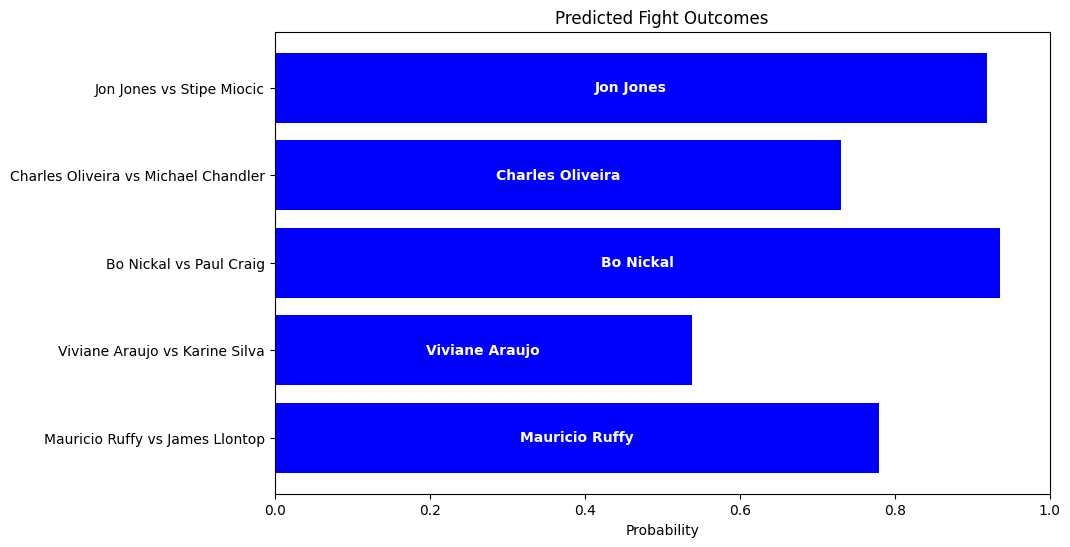

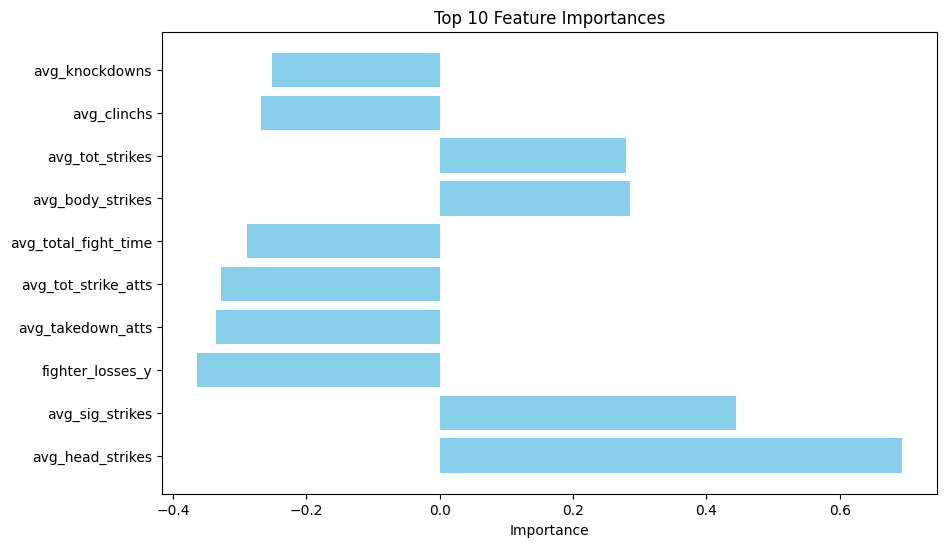

In [17]:
import matplotlib.pyplot as plt

# --- Visualize Predictions ---

# Prepare data for plotting
fighter_names = [f"{f1} vs {f2}" for f1, f2 in fights_for_prediction]
win_probabilities = [p[1] if pred == 1 else p[0] for pred, p in zip(predictions, probabilities)]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(fighter_names, win_probabilities, color=['blue' if p > 0.5 else 'red' for p in win_probabilities])
plt.xlabel('Probability')
plt.title('Predicted Fight Outcomes')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Add text annotations to the bars indicating the predicted winner
for bar, (f1, f2), prob in zip(bars, fights_for_prediction, win_probabilities):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f1 if prob > 0.5 else f2,
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

# --- Visualize Feature Importance ---

# Get feature importances from the logistic regression model
importances = pipeline.named_steps['classifier'].coef_[0]
feature_names = X_train.columns

# Sort feature importances in descending order and select top 10
indices = np.argsort(np.abs(importances))[::-1][:10]  # Select top 10 indices

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()